# pre-processing

In [11]:
#enable autocomplete
%config IPCompleter.greedy=True 

#load packages
import sys #access to system parameters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#load data
file_path = r"titanic_train.csv"
data = pd.read_csv(file_path)
#complete missing age with median
data['Age'].fillna(data['Age'].median(), inplace = True)

#complete missing fare with median
data['Fare'].fillna(data['Fare'].median(), inplace = True)

#complete embarked with mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)

#complete Cabin with mode
data['Cabin'].fillna(data['Cabin'].mode()[0], inplace = True)

data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

data['IsAlone'] = 1 #initialize to yes/1 is alone
data['IsAlone'].loc[data['FamilySize'] > 1] = 0

def my_regex(x):
    try:
        num = re.search(r'[0-9]+',x)
        return num.group(0)
    except:
        return 0
    return 

data['Cabin Num'] = data.Cabin.apply(lambda x : my_regex(x))    
#data.head()  

x = data[['Cabin Num','IsAlone','FamilySize','Parch','SibSp','Age','Survived']]

y = data.Fare

C:\Users\zigi\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


# train test val split

In [12]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Linear Regression

In [24]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train, y_train)

print("Linear Regression Score")
print(reg.score(x_test, y_test))
print("\n")

print("Linear Regression coefficient")
print(reg.coef_)
print("\n")

print("Linear Regression intercept")
print(reg.intercept_ )
print("\n")


y_pred = reg.predict(x_test)

Linear Regression Score
0.2055942341162006


Linear Regression coefficient
[  0.         -16.29800063   3.76885275   4.63955978  -0.87070703
   0.68310994  23.55241546]


Linear Regression intercept
5.169925459011463




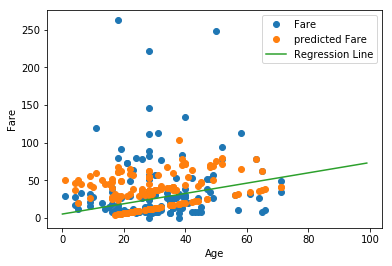

In [28]:
#plot results

x_range = [i for i in range(100)]
y_line_list = list()
for i in x_range:
    y_line = reg.coef_[5]*i + reg.intercept_
    y_line_list.append(y_line)
    

plt.plot(x_test['Age'],y_test,'o')
plt.plot(x_test['Age'],y_pred,'o')
plt.plot(x_range,y_line_list)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(['Fare','predicted Fare','Regression Line'])
plt.show()

# Ridge Regression

In [63]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1000.0)

ridge.fit(x_train,y_train)

print("Ridge Regression Score")
print(ridge.score(x_test, y_test))
print("\n")

print("Ridge Regression coefficient")
print(ridge.coef_)
print("\n")

print("Ridge Regression intercept")
print(ridge.intercept_ )
print("\n")


y_pred = ridge.predict(x_test)

Ridge Regression Score
0.12097247420422597


Ridge Regression coefficient
[ 0.         -2.35042716  3.6409154   2.43217433  1.20874106  0.5932929
  3.16138129]


Ridge Regression intercept
7.0011972304487315




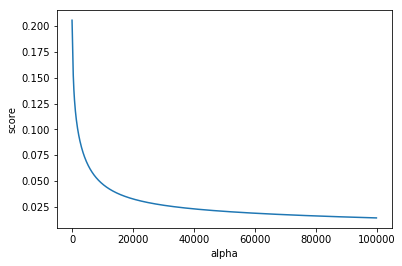

min score: 0.01418019224306799


In [69]:
#regularization - alpha
ridge_score_list = list()
for i in range(1,100000,100):

    ridge = Ridge(alpha=i)

    ridge.fit(x_train,y_train)

    ridge_score_list.append(ridge.score(x_test, y_test))

plt.plot([i for i in range(1,100000,100)],ridge_score_list)
plt.xlabel("alpha")
plt.ylabel("score")
plt.show()

print("min score: " + str(ridge_score_list[-1]))

# Lasso Regression

In [52]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=10.0)

lasso.fit(x_train,y_train)

print("Lasso Regression Score")
print(lasso.score(x_test, y_test))
print("\n")

print("Lasso Regression coefficient")
print(lasso.coef_)
print("\n")

print("Lasso Regression intercept")
print(lasso.intercept_ )
print("\n")


y_pred = lasso.predict(x_test)

Lasso Regression Score
0.07683904852152257


Lasso Regression coefficient
[ 0.         -0.          4.4216933   0.          0.          0.49746839
  0.        ]


Lasso Regression intercept
9.6738855164453




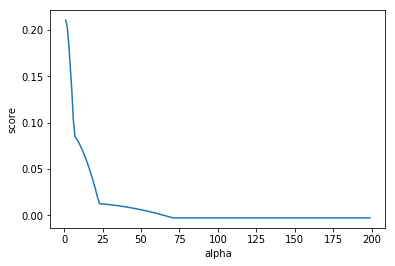

min score: 0.00162600044946426


In [85]:
#regularization - alpha
lasso_score_list = list()
for i in range(1,200,1):

    lasso = Lasso(alpha=i)

    lasso.fit(x_train,y_train)

    lasso_score_list.append(lasso.score(x_test, y_test))

plt.plot([i for i in range(1,200,1)],lasso_score_list)
plt.xlabel("alpha")
plt.ylabel("score")
plt.show()

print("min score: " + str(lasso_score_list[60]))

# ElasticNet Regression

In [60]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html
from sklearn.linear_model import ElasticNet

regr = ElasticNet(alpha=10)

regr.fit(x_train,y_train)

print("ElasticNet Regression Score")
print(regr.score(x_test, y_test))
print("\n")

print("ElasticNet Regression coefficient")
print(regr.coef_)
print("\n")

print("ElasticNet Regression intercept")
print(regr.intercept_ )
print("\n")


y_pred = regr.predict(x_test)

ElasticNet Regression Score
0.060133065833424586


ElasticNet Regression coefficient
[ 0.         -0.24911003  2.07539028  0.58392416  0.49147016  0.45907649
  0.26975831]


ElasticNet Regression intercept
14.974767296200497




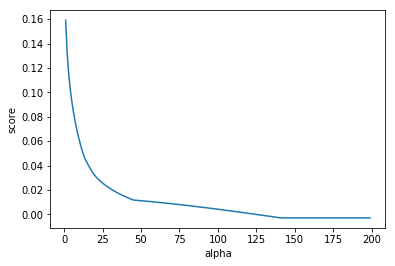

min score: 0.0006606396193225006


In [96]:
#regularization - alpha
ElasticNet_score_list = list()
for i in range(1,200,1):

    regr = ElasticNet(alpha=i)

    regr.fit(x_train,y_train)

    ElasticNet_score_list.append(regr.score(x_test, y_test))

plt.plot([i for i in range(1,200,1)],ElasticNet_score_list)
plt.xlabel("alpha")
plt.ylabel("score")
plt.show()

print("min score: " + str(ElasticNet_score_list[120]))

In [102]:
#Validation

regr = ElasticNet(alpha=ElasticNet_score_list[120])
regr.fit(x_train,y_train)

print("ElasticNet prediction on Validation set")
print(regr.score(x_val, y_val))

ElasticNet prediction on Validation set
0.06365691222333147


C:\Users\zigi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
